In [1]:
from datetime import date
today = date.today()
print(f'Last Run: {today}')

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

import os

Last Run: 2022-03-08


- Download leader tracker and run LT_cleaning_2022 before this for updated counts

# Looking at email/phone/zip coverage for each organizers leader tracker

## Read data

In [2]:
df = pd.read_csv('OOC 2022 Leaders Cleaned.csv')
df['Organizer'].replace({'Rachael1':'Rachael'}, inplace=True)
df.head(2)

,First Name,Last Name,E-Mail,Phone,Don't Add to Hustle,Zip Code,Institution,Leadership Status,Core Team,Relational Organizing Leader,Recruited By,Notes & Reflections,Organizer,Title,Organization,Membership
0,Tayjua,Hines,jhines30@kent.edu,NaN,False,NaN,Kent State,1-Prospect,No,No,Me,"Current President of BUS, former member of the...",Akii,NaN,OSA,OSA: Columbus
1,Maggie,Ash,maggie@ignitenational.org,3.307047e+10,True,NaN,OSU,NaN,No,No,Me,"Recent graduate from OSU, currently a fellow w...",Akii,NaN,OSA,OSA: Columbus


## Counts by Organizer

In [3]:
counts = df.groupby(by='Organizer')[['First Name', 'Last Name', 'E-Mail', 'Phone', 'Zip Code']].count().sort_values('First Name', ascending=False)
counts
countst = counts.transpose()
countst

Organizer,Edwin,Rachael,Daniel,Tami,Kalesha,Akii,Derrick,Janiah
First Name,364,291,98,54,43,42,32,19
Last Name,364,291,94,54,38,41,32,18
E-Mail,361,257,121,47,37,35,0,10
Phone,242,67,7,33,32,3,0,5
Zip Code,255,3,0,20,38,2,0,4


## Counts by Organizer, Visualized

Folder "organizer_row_coverage_2022-03-08" already exists. No new folder created


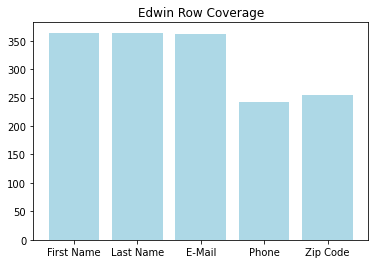

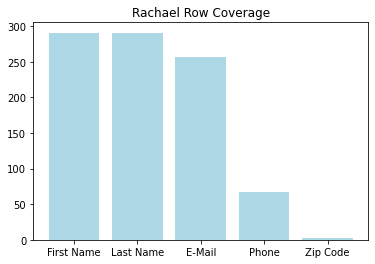

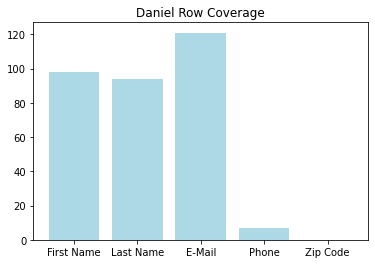

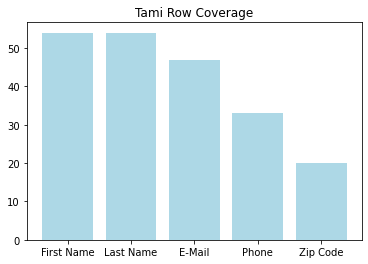

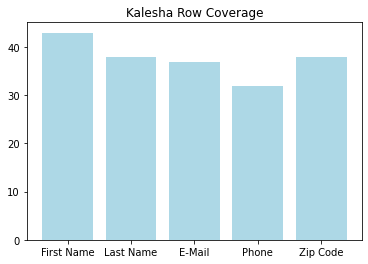

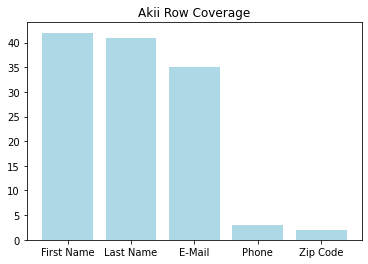

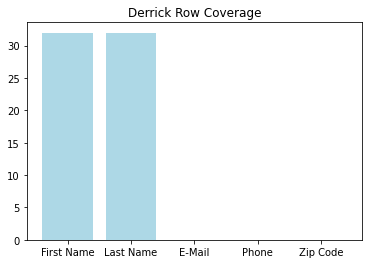

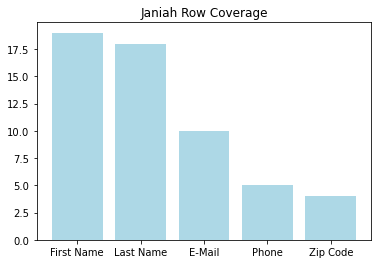

In [4]:
folder = r'C:\Users\OOC User\Documents\OOC\Data\Leader Tracking\2022'
directory = f'organizer_row_coverage_{today}'
path = os.path.join(folder, directory)
try: 
    os.makedirs(path)
    print(f'Folder "organizer_row_coverage_{today}" created')
except: 
    print(f'Folder "organizer_row_coverage_{today}" already exists. No new folder created')
    
for i in countst:
    plt.figure()
    plt.bar(countst[i].index, countst[i], color='lightblue')
    plt.title(f'{i} Row Coverage')
    save_as = f'{i} Leader Tracker Row Coverage {today}'
    plt.savefig(os.path.join(path, save_as)+'.png', facecolor='white') #Save plots
plt.show()

## Read in data from beginning of the year (jan 12 2022)

In [5]:
df2 = pd.read_csv('OOC 2022 Leaders Cleaned_jan4_2022.csv')
# df2

## Historic counts

In [6]:
organizers_2021 = ['Edwin', 'Rachael', 'Daniel', 'Tami', 'Kalesha', 'Akii', 'Derrick']
counts2 = df2.groupby(by='Organizer')[['First Name', 'Last Name', 'E-Mail', 'Phone', 'Zip Code']].count().sort_values('First Name', ascending=False)
# counts2
countst2 = counts2.transpose()
countst2 = countst2[organizers_2021]
countst2

Organizer,Edwin,Rachael,Daniel,Tami,Kalesha,Akii,Derrick
First Name,364,267,92,40,43,34,32
Last Name,364,267,88,27,38,34,32
E-Mail,361,233,115,10,37,30,0
Phone,242,49,0,0,32,2,0
Zip Code,255,1,0,0,38,2,0


## Compare Jan4 and Current row coverage

Folder "organizer_row_coverage_comparison_2022-03-08" already exists. No new folder created




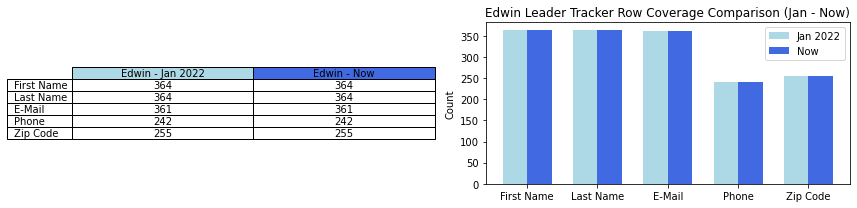

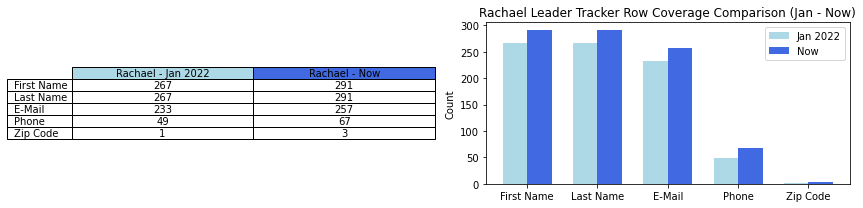

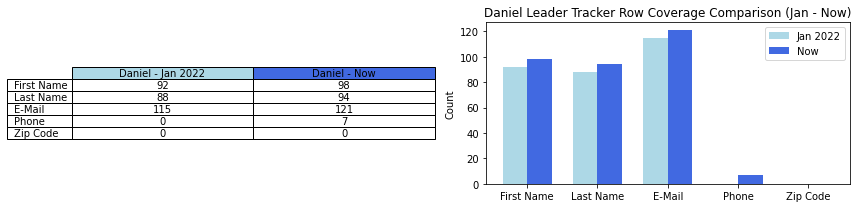

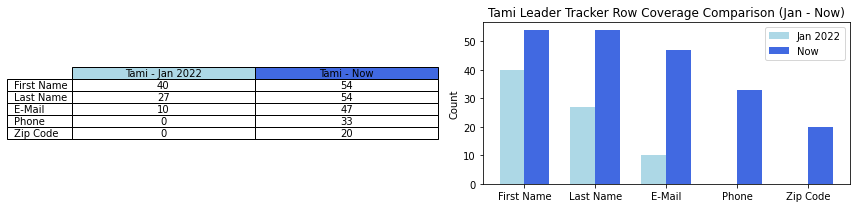

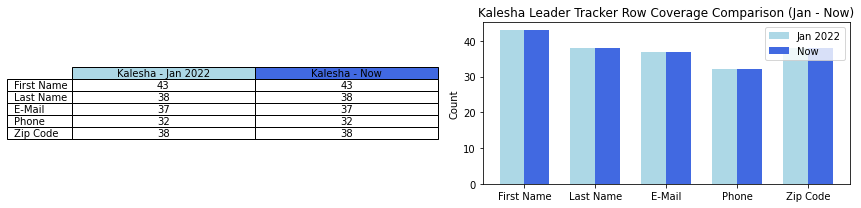

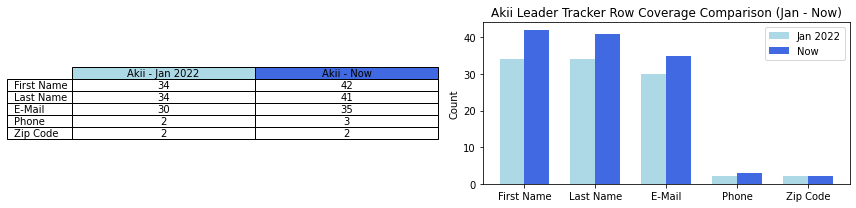

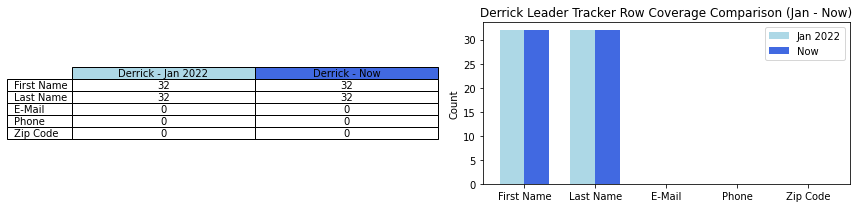

In [7]:
folder = r'C:\Users\OOC User\Documents\OOC\Data\Leader Tracking\2022'
directory = f'organizer_row_coverage_comparison_{today}'
path = os.path.join(folder, directory)
try: 
    os.makedirs(path)
    print(f'Folder "organizer_row_coverage_comparison_{today}" created\n\n')
except: 
    print(f'Folder "organizer_row_coverage_comparison_{today}" already exists. No new folder created\n\n')

for i in organizers_2021:

    labels = list(countst.index)
    current = countst[i]
    historic = countst2[i]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))

    table = pd.concat([countst2[i], countst[i]], axis=1)
    table.columns = [f'{i} - Jan 2022', f'{i} - Now']
    ax1.axis('off')
    ax1.table(cellText=table.values,
                          rowLabels=table.index,
                          colLabels=table.columns,
                          loc='center', 
                          cellLoc='center', 
                          colColours=['lightblue', 'royalblue'])

    rects1 = ax2.bar(x - width/2, historic, width, label='Jan 2022', color='lightblue')
    rects2 = ax2.bar(x + width/2, current, width, label='Now', color='royalblue')
    ax2.set_ylabel('Count')
    ax2.set_title(f'{i} Leader Tracker Row Coverage Comparison (Jan - Now)')
    ax2.legend()

    plt.xticks(x, labels)
    plt.tight_layout()
    
    save_as = f'{i} Leader Tracker Row Coverage {today}'
    plt.savefig(os.path.join(path, save_as)+'.png', facecolor='white') #Save plots

    plt.show()